In [181]:
from sklearn.datasets import make_classification
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X, y= make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)


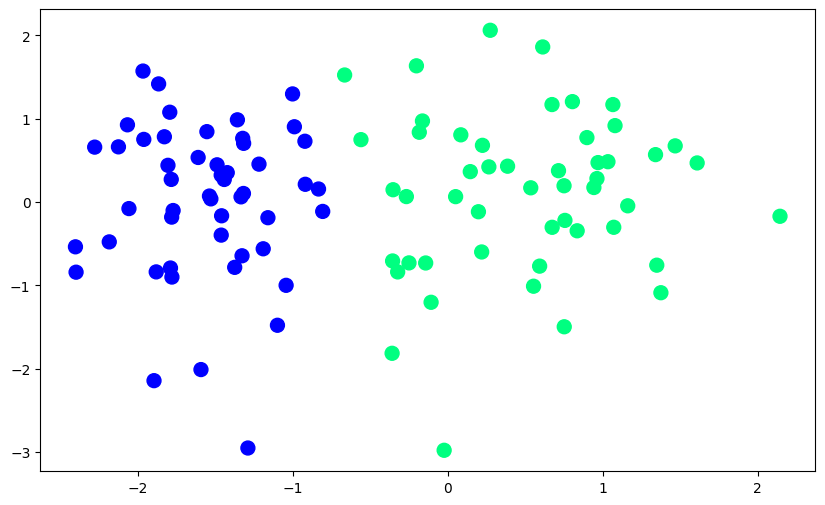

In [182]:
#@ Visualizing the dataset:

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [183]:
#@ Building Perceptron:

def perceptron(X, y):
    epochs=1500
    X=np.insert(X, 0, 1, axis=1) #this is done to insert 1 before every rows for bias
    weights=np.ones(X.shape[1])
    learning_rate=0.1
    
    #iterating 1500 times:
    for i in range(epochs):
        j=np.random.randint(0, 100) #Random value from dataset between 0 & 100
        y_hat= step(np.dot(X[j], weights))
        weights=weights+learning_rate*(y[j]-y_hat)*X[j]

    return weights[0], weights[1:]


In [184]:
def step(z):
    return 1 if z>0 else 0

In [185]:
intercept_, coef_=perceptron(X, y)

In [186]:
print(intercept_)
print(coef_)

0.9
[1.37590214 0.15244004]


- If the equation is Ax+By+C=0  then y=-(A/B)x-(C/B) which is similar to y=Mx+C. Therefore, 

M=-A/B & C=-C/B

In [187]:
m= -(coef_[0]/coef_[1])
b= -(intercept_/coef_[1]) #here intercept 'c' is actually bias in our case

In [188]:
x_input=np.linspace(-3, 3, 100)
y_input=m*x_input +b

(-3.0, 2.0)

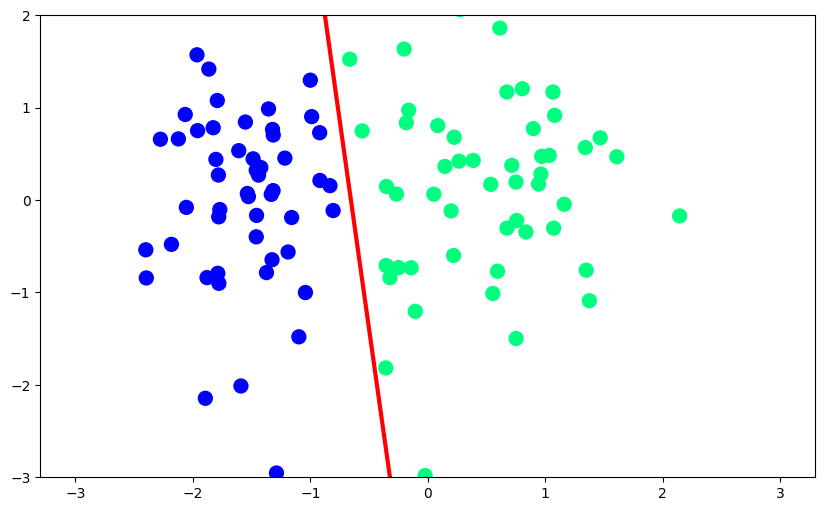

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)